# Matlab to Python conversion

There seems to be an natural progression that occurs for users of data anaylsis programs. I believe the forces guiding those changes are not coincidental, but out of necessity based on the ease of learning, functionality, extensibility, scalability and cost. In my opinion, the best method for theory is still handwritten, but when more advanced concepts are learned, more powerful tools make those concepts easier to understand. 

Anectdotally, everyone seems to start with a spreadsheet application for data analysis and plotting, which, at least 3 or 4 years ago would have been a Microsoft product. Excel works well for simple plotting, small datasets, and the software is ubiqutous but not free. 

Some users may have had the curosity to investigate the macro tool and discovered programming by way of Visual Basic for Applications (VBA) in Excel. This gives the user a bit more control over data creation and processing with loops. 

Once at a university, many students, especially engineering students, will discover MATLAB, and realized that VBA is very tedious compared to MATLAB syntax. The student will spend hundreds of hours learning programming fundamentals with this great new tool, and create many programs with it.

The crux of the programmers life so far will be when that MATLAB license expires and, not resorting to any illegal software copyright infringement, will be left out in the cold world of computing for data anaylsis and engineering.

Until, one day, when that recent graduate discovers that the road does not end with MATLAB, but is just the beginning. The realization that real programming languages exist and are used every day for data anaylsis that do not cost a dime and work very well, but may have a bit of a learning curve.

That is where we are now, how do I get all my old excel, matlab and vba projects into python? The first step is to install python. The really important library is [scipy](http://www.scipy.org/), which has nearly all the libraries one would need to perform basic scientific work. 

Note this work was done on a Windows 7 machine with Anaconda 2.7 installed

## Option 1 - Manual Conversion  
There are a few options for converting code. The most reliable is probably by hand. To covert by hand requires a through understanding of python and matlab. I am assuming matlab syntax is well understood, but python less so. scipy provides a [python for matlab users](http://wiki.scipy.org/NumPy_for_Matlab_Users) which describes to similarities and differences well, but the devil is in the details. Many other comparisions exist for python and matlab, like [here on pyzo's website](http://www.pyzo.org/python_vs_matlab.html)

## Option 2 - Reuse old code with Octave  

[oct2py](https://pypi.python.org/pypi/oct2py) , [source code](http://blink1073.github.io/oct2py/)
This is a neat module that is based on [octave](http://www.gnu.org/software/octave/), which is an open-source matlab clone. It allows a simple translation of matlab/octave syntax to python directly.

In [1]:
%matplotlib inline
from oct2py import octave
from oct2py import Oct2Py
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML 

Instantiate the Oct2Py object as oc

In [3]:
oc = Oct2Py()

### Matrix creation

First, lets remind ourselves of matlab sytnax of matrix/array creation (which I happen to prefer over python, but hey, beggers can't be choosers')

In [4]:
y = oc.eval("[1 2 3];")
y

array([[ 1.,  2.,  3.]])

Not bad. For me, the difference in slicing arrays and matrices is a tough transition, but this makes it much easier than learning the fundamentals

In [5]:
y = oc.eval("[1 2 3;4 5 6];")
y

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

We can see it creates a matlab matrix and converts it exactly how we would need it in numpy

In [6]:
type(y)

numpy.ndarray

Lets try something a bit more complex with analaogous syntax. Here is a matrix define natively in python

In [7]:
numpyarr = np.array([[1, 2,3,4], [5,6,7,8],[9,10,11,12],[13,14,15,16]], dtype=float)
numpyarr

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.],
       [  9.,  10.,  11.,  12.],
       [ 13.,  14.,  15.,  16.]])

and here is the same matrix defined in matlab/octave syntax

In [8]:
matlabarr = oc.eval("[1 2 3 4; 5 6 7 8; 9 10 11 12; 13 14 15 16];") 
matlabarr

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.],
       [  9.,  10.,  11.,  12.],
       [ 13.,  14.,  15.,  16.]])

clearly, they are the same!

In [9]:
matlabarr == numpyarr

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

### Plotting with oct2py

Just using oct2py, we can plot using [gnuplot](http://www.gnuplot.info/), I haven't been able to find a way to plot them inline, but they still look good in the gnuplot window

In [14]:
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.sin(x)
oc.plot(x,y,'-o', linewidth=2)

<img src="../../files/matlab-to-python-conversion/images/octave.png">  

We can see that is uses wxpython, which is another gui package. I am not 100% sure when that package was installed, but I am guess it was installed along with Octave    

<img src="../../files/matlab-to-python-conversion/images/plotting_window.png">  

## More matlab execution

Although this doesn't convert the code to python, it executes it very well. Here is a MATLAB code snippet for LU Decomposition. We can create a python string with the contents of this and evaluate it as octave code

```
% function [L,U] = LUCrout(A)
% Decomposes matrix A into a Lower matrix L and Upper matrix U
% A = LU
A = [1,5,3,5;  2,5,6,7; 9,0,3,4; 9,4,7,6]
A
[R,C] = size(A);
for i = 1:R
    L(i,1) = A(i,1);
    U(i,i) = 1;
end
for j = 2:R
    U(1,j) = A(1,j)/L(1,1);
end
for i = 2:R
    for j = 2:i
        L(i,j) = A(i,j) - L(i,1:j-1)*U(1:j-1,j);
    end
    for j = i+1:R
        U(i,j) = (A(i,j) - L(i,1:i-1)*U(1:i-1,j))/L(i,i);
    end
end
L
U
```

In [15]:
x = '''
% function [L,U] = LUCrout(A)
% Decomposes matrix A into a Lower matrix L and Upper matrix U
% A = LU
A = [1,5,3,5;  2,5,6,7; 9,0,3,4; 9,4,7,6]
A
[R,C] = size(A);
for i = 1:R
    L(i,1) = A(i,1);
    U(i,i) = 1;
end
for j = 2:R
    U(1,j) = A(1,j)/L(1,1);
end
for i = 2:R
    for j = 2:i
        L(i,j) = A(i,j) - L(i,1:j-1)*U(1:j-1,j);
    end
    for j = i+1:R
        U(i,j) = (A(i,j) - L(i,1:i-1)*U(1:i-1,j))/L(i,i);
    end
end
L
U
'''

In [16]:
oc.eval(x)

A =

        1        5        3        5
        2        5        6        7
        9        0        3        4
        9        4        7        6

A =

        1        5        3        5
        2        5        6        7
        9        0        3        4
        9        4        7        6

L =

  1.0e+001 *

  0.10000  0.00000  0.00000  0.00000
  0.20000  -0.50000  0.00000  0.00000
  0.90000  -4.50000  -2.40000  0.00000
  0.90000  -4.10000  -2.00000  -0.27333

U =

  1.00000  5.00000  3.00000  5.00000
  0.00000  1.00000  -0.00000  0.60000
  0.00000  0.00000  1.00000  0.58333
  0.00000  0.00000  0.00000  1.00000


If you are using an ipython notebook, we can take advantage of the magic functions and execute Octave/MATLAB code directly in the cells. To activate this functionality, we need to install Octave first, then install oct2py.

In [17]:
%load_ext oct2py.ipython

For single line octave code, we can use this syntax

In [18]:
x = %octave [1 2 3 4; 5 6 7 8; 9 10 11 12; 13 14 15 16];
x

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.],
       [  9.,  10.,  11.,  12.],
       [ 13.,  14.,  15.,  16.]])

This is very similar to the example earlier, except that is it running the code rather than evaluating a string. We can see that it creates a numpy array just like before

In [19]:
type(x)

numpy.ndarray

If we want multi-line MATLAB/Octave sytax, we can use this syntax

In [20]:
%%octave
x = [1 2 3 4; 5 6 7 8; 9 10 11 12; 13 14 15 16];
x
typeinfo(x)

x =

        1        2        3        4
        5        6        7        8
        9       10       11       12
       13       14       15       16

ans = matrix

in that cell, x is still a matlab matrix, but when we show 'x' in the next cell, it is now a numpy array

In [21]:
x

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.],
       [  9.,  10.,  11.,  12.],
       [ 13.,  14.,  15.,  16.]])

Lets try our LU function by loading the file, and replacing adding the octave magic function. execute

```
%load LU.m
```   

and then add  

```  
%%octave  
```  

to the very top and delete 

```
#%load LU.m
```

In [22]:
%%octave
% function [L,U] = LUCrout(A)
% Decomposes matrix A into a Lower matrix L and Upper matrix U
% A = LU
A = [1,5,3,5;  2,5,6,7; 9,0,3,4; 9,4,7,6]
A
[R,C] = size(A);
for i = 1:R
    L(i,1) = A(i,1);
    U(i,i) = 1;
end
for j = 2:R
    U(1,j) = A(1,j)/L(1,1);
end
for i = 2:R
    for j = 2:i
        L(i,j) = A(i,j) - L(i,1:j-1)*U(1:j-1,j);
    end
    for j = i+1:R
        U(i,j) = (A(i,j) - L(i,1:i-1)*U(1:i-1,j))/L(i,i);
    end
end
L
U

A =

        1        5        3        5
        2        5        6        7
        9        0        3        4
        9        4        7        6

A =

        1        5        3        5
        2        5        6        7
        9        0        3        4
        9        4        7        6

L =

  1.0e+001 *

  0.10000  0.00000  0.00000  0.00000
  0.20000  -0.50000  0.00000  0.00000
  0.90000  -4.50000  -2.40000  0.00000
  0.90000  -4.10000  -2.00000  -0.27333

U =

  1.00000  5.00000  3.00000  5.00000
  0.00000  1.00000  -0.00000  0.60000
  0.00000  0.00000  1.00000  0.58333
  0.00000  0.00000  0.00000  1.00000

Excellent. This appraoch keeps the code more native than having the copy and paste the code and create a string to be evalauted. And just for fun we can plot inline also!!!

12*x^4 - 2.5*x^3 - 8*x^2 - 0.1*x^1 + 8

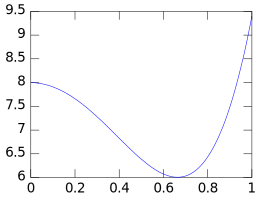

In [23]:
%%octave
p = [12 -2.5 -8 -0.1 8];
x = 0:0.01:1;

polyout(p, 'x')
plot(x, polyval(p, x));

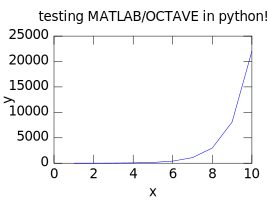

In [24]:
%%octave
x = 1:10;
y = exp(x);
plot(x,y)
xlabel('x')
ylabel('y')
title('testing MATLAB/OCTAVE in python!')

Not bad for a few minutes of work. Lets take a look at what other options we have

## Option 3 - SMOP
###[SMOP](https://pypi.python.org/pypi/smop) (Small Matlab and Octave to Python Converter) or [here](https://github.com/victorlei/smop) 
The smop package seems impressive, and works well for an actual conversion of MATLAB code. Lets see how it works

To convert a MATLAB file named LU.m, follow the sytanx here

In [117]:
!python smop-0.26.2/smop/main.py LU.m

the resulting file is 'a.py', which is the python equivalent. Lets have a peek and see how we did. load the file directly in ipython by

```
%load a.py
```




In [127]:
# %load a.py
# Autogenerated with SMOP version 
# smop-0.26.2/smop/main.py LU.m

from __future__ import division
try:
    from runtime import *
except ImportError:
    from smop.runtime import *

A=[[1,5,3,5],[2,5,6,7],[9,0,3,4],[9,4,7,6]]
R,C=size(A,nargout=2)
for i in arange_(1,R).reshape(-1):
    L[i,1]=A(i,1)
    U[i,i]=1
for j in arange_(2,R).reshape(-1):
    U[1,j]=A(1,j) / L(1,1)
for i in arange_(2,R).reshape(-1):
    for j in arange_(2,i).reshape(-1):
        L[i,j]=A(i,j) - L(i,arange_(1,j - 1)) * U(arange_(1,j - 1),j)
    for j in arange_(i + 1,R).reshape(-1):
        U[i,j]=(A(i,j) - L(i,arange_(1,i - 1)) * U(arange_(1,i - 1),j)) / L(i,i)


ImportError: No module named smop.runtime

Yikes, not great. Looks like some info got lost in translation. I tried fixing it up a bit but didn't get anything worth while

## Option 4 - LibreMat  

### [LibreMate](http://sourceforge.net/projects/libermate/)

I didn't install LibreMat because of the dependent packages, so I'll leave a review to someone else

## Option 5 - OMPC

### [OMPC](http://ompc.juricap.com/) (open-source matlab to python converter)

The [examples](http://ompc.juricap.com/Examples) are descriptive and explain many user cases. When you are ready to convert, check out the [live web converter](http://ompclib.appspot.com/m2py) which is great for processing snippets. However, when I tried to convert the LU function above, I get this, which creates a wierd A array and an undeclared vector mslice. There may be an explanation of this in the documentation, but it isn't obvious I didn't look very much

```
A = mcat([1, 5, 3, 5, OMPCSEMI, 2, 5, 6, 7, OMPCSEMI, 9, 0, 3, 4, OMPCSEMI, 9, 4, 7, 6])
A()
[R, C] = size(A)
for i in mslice[1:R]:
    L(i, 1).lvalue = A(i, 1)
    U(i, i).lvalue = 1
    end
    for j in mslice[2:R]:
        U(1, j).lvalue = A(1, j) / L(1, 1)
        end
        for i in mslice[2:R]:
            for j in mslice[2:i]:
                L(i, j).lvalue = A(i, j) - L(i, mslice[1:j - 1]) * U(mslice[1:j - 1], j)
                end
                for j in mslice[i + 1:R]:
                    U(i, j).lvalue = (A(i, j) - L(i, mslice[1:i - 1]) * U(mslice[1:i - 1], j)) / L(i, i)
                    end
                    end
                    U()
                    L()
```

The conversion generate non-usable code, so well scratch this one also 

## Summary
I definitely prefer the oct2py package, I can run my native MATLAB code in a python environment, and surely there will be support for other languages in the ipython notebook (bash, R, Julia, etc)

Now that we have some options for running MATLAB/Octave code in python, the conversion process should be easier. I will be posting projects as I convert them, so stay tuned. 